In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import spectrogram

In [ ]:
# 设置采样率和时间参数
sampling_rate = 1000  # 采样频率 1000 Hz
duration = 1          # 信号持续时间 1秒
data_step = 1/sampling_rate  # 每个数据点的时间间隔
t = np.arange(0, duration, data_step)  # 时间向量

In [3]:
f1, f2 = 50, 120  # 信号的两个频率成分
clean_signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)  # 干净信号
noise = 2.5 * np.random.randn(len(t))  # 添加的噪声
noisy_signal = clean_signal + noise  # 带噪声的信号

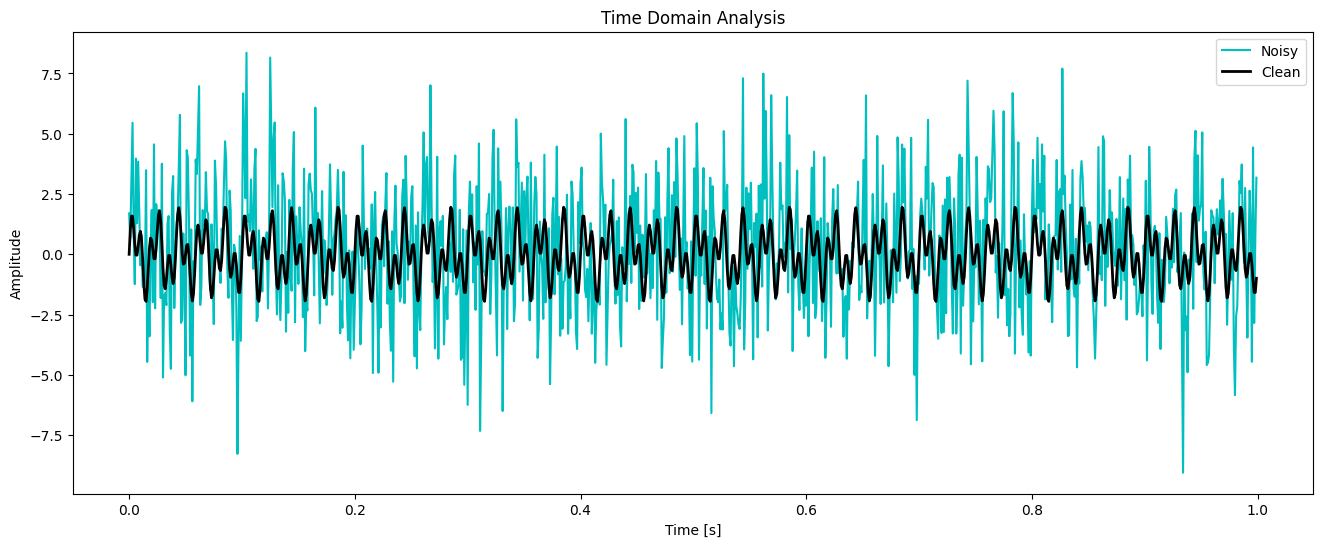

In [10]:
# 绘制时域信号
plt.figure(figsize=(16, 6))
# plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, clean_signal, color='k', linewidth=2, label='Clean')
plt.title("Time Domain Analysis")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
# plt.grid(True)


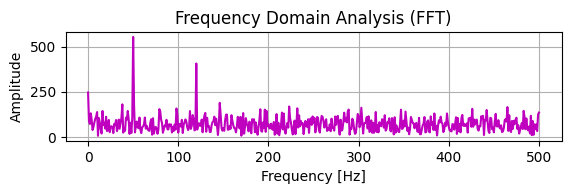

In [11]:
# 快速傅里叶变换（FFT）
n = len(t)  # 信号的长度
yf = rfft(noisy_signal)  # 对带噪声的信号进行FFT
xf = rfftfreq(n, data_step)  # 计算频率轴

# 绘制频域图
plt.subplot(3, 1, 2)
plt.plot(xf, np.abs(yf), color='m')
plt.title("Frequency Domain Analysis (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)


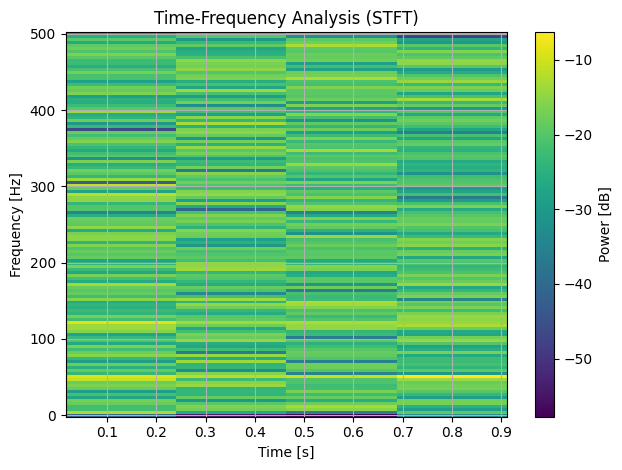

In [13]:
# 使用 STFT 进行时频分析
f, t_spec, Sxx = spectrogram(noisy_signal, fs=sampling_rate, nperseg=256)

# 绘制时频图

plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='auto')  # 使用对数尺度显示幅度
plt.title("Time-Frequency Analysis (STFT)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Power [dB]")
plt.grid(True)

# 显示所有图形
plt.tight_layout()
plt.show()
